# Process dataset using Pandas packages:

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["font.size"] = 8

import warnings
warnings.filterwarnings('ignore')

## Import packages

In [2]:
# import modules
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd # pandas package

import numpy as np
import xarray as xr # the major tool to work with NetCDF data!

from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
#type(WhGrYlRd)  # custom colormap

In [3]:
fname = '../nc/OCO2_b91_10sec_GOOD_r24.nc4'
ds = xr.open_dataset(fname, engine='netcdf4')
ds # same as print(ds) in IPython/Jupyter environment

<xarray.Dataset>
Dimensions:                       (epoch_dimension: 7, levels: 20, sounding_id: 1319634)
Coordinates:
  * sounding_id                   (sounding_id) int64 20140906020721 ... 20190731225946
Dimensions without coordinates: epoch_dimension, levels
Data variables:
    test_flag                     (sounding_id) int8 ...
    latitude                      (sounding_id) float32 ...
    longitude                     (sounding_id) float32 ...
    data_type                     (sounding_id) int8 ...
    date                          (sounding_id, epoch_dimension) int16 ...
    time                          (sounding_id) datetime64[ns] ...
    solar_zenith_angle            (sounding_id) float32 ...
    solar_azimuth_angle           (sounding_id) float32 ...
    sensor_zenith_angle           (sounding_id) float32 ...
    sensor_azimuth_angle          (sounding_id) float32 ...
    psurf_apriori_b8              (sounding_id) float32 ...
    psurf_apriori_o2a             (sounding_id) float32 ...
    psurf_apriori_wco2            (sounding_id) float32 ...
    psurf_apriori_sco2            (sounding_id) float32 ...
    psurf_apriori                 (sounding_id) float32 ...
    psurf                         (sounding_id) float32 ...
    xco2_raw                      (sounding_id) float32 ...
    xco2_apriori                  (sounding_id) float32 ...
    xco2                          (sounding_id) float32 ...
    xco2_uncertainty              (sounding_id) float32 ...
    model_error                   (sounding_id) float32 ...
    co2_profile_apriori           (sounding_id, levels) float32 ...
    xco2_averaging_kernel         (sounding_id, levels) float32 ...
    pressure_weight               (sounding_id, levels) float32 ...
    sigma_levels                  (levels) float32 ...
    xco2_quality_flag             (sounding_id) int8 ...
    warn_level                    (sounding_id) int8 ...
    land_fraction                 (sounding_id) int8 ...
    altitude                      (sounding_id) float32 ...
    airmass                       (sounding_id) float32 ...
    path                          (sounding_id) int16 ...
    operation_mode                (sounding_id) int8 ...
    land_water_indicator          (sounding_id) int8 ...
    surface_type                  (sounding_id) int8 ...
    fs                            (sounding_id) float32 ...
    delta_windspeed               (sounding_id) float32 ...
    s31                           (sounding_id) float32 ...
    s32                           (sounding_id) float32 ...
    albedo_3                      (sounding_id) float32 ...
    albedo_slope_3                (sounding_id) float32 ...
    aod_total                     (sounding_id) float32 ...
    albedo_2                      (sounding_id) float32 ...
    co2_grad_del                  (sounding_id) float32 ...
    dws                           (sounding_id) float32 ...
    dpfrac                        (sounding_id) float32 ...
    dp_o2a                        (sounding_id) float32 ...
    dp                            (sounding_id) float32 ...
    dp_abp                        (sounding_id) float32 ...
    co2_ratio                     (sounding_id) float32 ...
    h2o_ratio                     (sounding_id) float32 ...
    xco2_weak_idp                 (sounding_id) float32 ...
    xco2_strong_idp               (sounding_id) float32 ...
    tcwv_apriori                  (sounding_id) float32 ...
    tcwv                          (sounding_id) float32 ...
    ice_height                    (sounding_id) float32 ...
    h2o_scale                     (sounding_id) float32 ...
    deltaT                        (sounding_id) float32 ...
    snr_o2a                       (sounding_id) float32 ...
    snr_wco2                      (sounding_id) float32 ...
    snr_sco2                      (sounding_id) float32 ...
    altitude_stddev               (sounding_id) float32 ...
    N_total_shots                 (sounding_id

Reading in co2, lon, lat series 
,and combine them into a Pandas dataframe

In [4]:
dr = ds['xco2']  
lon_series = ds['longitude']
lat_series = ds['latitude']

df_xco2 = pd.DataFrame({'lon': lon_series, 'lat': lat_series, 'xco2': dr})

df_xco2.head()

,lon,lat,xco2
0,160.559998,54.509998,394.339996
1,158.809998,57.750000,394.010010
2,155.000000,63.259998,394.399994
3,154.600006,63.759998,393.190002
4,154.270004,64.169998,394.029999


In [5]:
sound_id = len(ds.coords['sounding_id'].values)
print(sound_id)

1319634


In [6]:
df_sorted = df_xco2.sort_values(by=['lon', 'lat'])
df_sorted[df_sorted['lat'].between(-50,30, inclusive = True)]
df_sorted.head()

,lon,lat,xco2
275578,-180.0,-59.110001,397.239990
627308,-180.0,-38.570000,401.739990
224583,-180.0,-34.730000,398.619995
1222133,-180.0,-26.500000,406.119995
666697,-180.0,-26.370001,401.739990


In [7]:
df_first_lon = df_sorted[df_sorted.lon == -180]
print(df_first_lon[df_first_lon.lat == -38.57])

          lon    lat       xco2
627308 -180.0 -38.57  401.73999


In [8]:
lat_res = 1
lon_res = 1
lat = np.linspace(-90, 90, 180/lat_res+1)
lon = np.linspace(-180, 180, 360/lon_res+1)
target = xr.DataArray(0, 
                      dims=('lat', 'lon'), 
                      coords={'lat': lat,
                              'lon': lon})
target = target.astype(dtype='float32')
target

<xarray.DataArray (lat: 181, lon: 361)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0

In [9]:
for ilon in np.arange(len(lon)-1):
    for ilat in np.arange(len(lat)-1):
        print(ilon)
        df_slice_lat = df_sorted[df_sorted['lat'].between(lat[ilat],lat[ilat+1], inclusive = True)]
        df_slice_lon = df_slice_lat[df_slice_lat['lon'].between(lon[ilon],lon[ilon+1], inclusive = True)]
        target[ilat,ilon] = df_slice_lon.xco2.mean()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
2

33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
3

49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
6

79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
8

94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
9

107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108


118
118
118
118
118
118
118
118
118
118
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
119
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120


130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131


142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143


153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155


165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
165
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166
166


176
176
176
176
176
176
176
176
176
176
176
176
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
177
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178


188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
188
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189


199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201
201


211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
211
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212
212


222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
222
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
223
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224


234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235


245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
245
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
246
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247


257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
257
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258
258


268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
268
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
269
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270


280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281
281


291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
291
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
293
293
293
293


303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
303
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304


314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316
316


326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
326
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327
327


338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339


349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
349
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
351
351
351
351


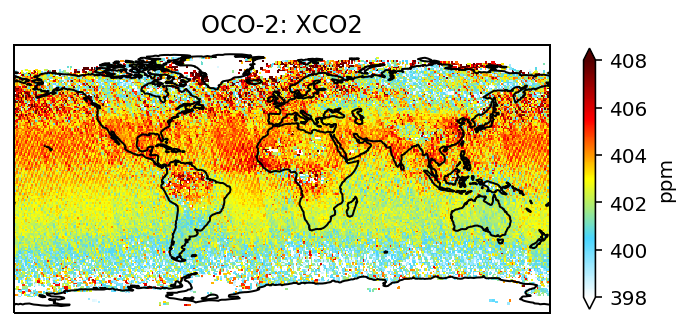

In [16]:
# after regridding
fig = plt.figure(figsize=[6, 6])
proj=ccrs.PlateCarree()

ax = plt.subplot(111, projection=proj)
ax.coastlines()
target.plot(ax=ax, transform=ccrs.PlateCarree(), vmax=408, vmin=398, cmap=WhGrYlRd, cbar_kwargs={'shrink': 0.4, 'label': 'ppm'})

ax.set_title('OCO-2: XCO2');

In [11]:
fig.savefig('../plots/xco2.png', dpi=300)

In [12]:
target.name = 'xco2'
target.attrs = dr.attrs
target.attrs['unit'] = 'ppm'
target.attrs['comment'] = 'aggregated from oco-2, by m.sadiq 2020'
target.to_netcdf('../nc/xco2_gridded.nc')

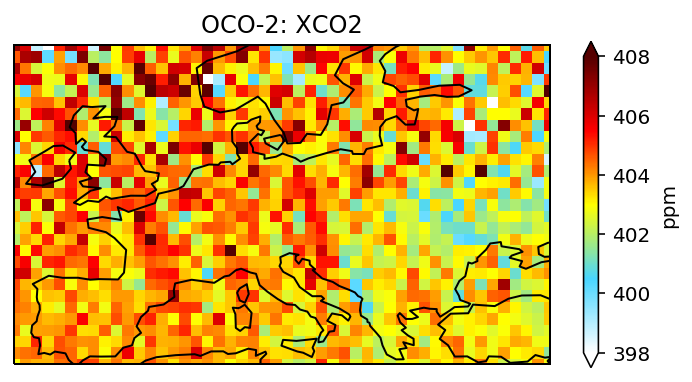

In [13]:
fig = plt.figure(figsize=[6, 6])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
target.plot(ax=ax, cmap=WhGrYlRd, vmax=408, vmin=398, cbar_kwargs={'shrink': 0.5, 'label': 'ppm'})  # The ax keyword is particularly useful for subplots. Can be omitted here.

ax.set_xlim(-11,36)
ax.set_ylim(36,64)
ax.set_title('OCO-2: XCO2');